<a href="https://colab.research.google.com/github/harshu4387/Mall-Customer/blob/main/Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')

In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.shape

(200, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerid            200 non-null    int64 
 1   gender                200 non-null    object
 2   age                   200 non-null    int64 
 3   annual_income_k       200 non-null    int64 
 4   spending_score_1-100  200 non-null    int64 
 5   cluster               200 non-null    int32 
 6   segment               200 non-null    object
dtypes: int32(1), int64(4), object(2)
memory usage: 10.3+ KB


In [ ]:
df.size

1400

In [ ]:
df.dtypes

,0
customerid,int64
gender,object
age,int64
annual_income_k,int64
spending_score_1-100,int64
cluster,int32
segment,object


In [ ]:
df.describe()

,customerid,age,annual_income_k,spending_score_1-100,cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.400000
std,57.879185,13.969007,26.264721,25.823522,1.449311
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


In [ ]:
df.isnull().sum()

,0
customerid,0
gender,0
age,0
annual_income_k,0
spending_score_1-100,0
cluster,0
segment,0


In [ ]:
df.mean(numeric_only=True)

,0
customerid,100.50
age,38.85
annual_income_k,60.56
spending_score_1-100,50.20
cluster,1.40


In [ ]:
df.mean(numeric_only=True)

,0
customerid,100.50
age,38.85
annual_income_k,60.56
spending_score_1-100,50.20
cluster,1.40


In [ ]:
df.count()

,0
customerid,200
gender,200
age,200
annual_income_k,200
spending_score_1-100,200
cluster,200
segment,200


In [ ]:
df.columns=(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace('- ','_')
    .str.replace(' ','_')
    .str.replace(r"[()$]","",regex=True)
    )

In [ ]:
df.columns

Index(['customerid', 'gender', 'age', 'annual_income_k',
       'spending_score_1-100', 'cluster', 'segment'],
      dtype='object')

In [ ]:
# selecting feature
x=df[['annual_income_k','spending_score_1-100']]
x.head()

,annual_income_k,spending_score_1-100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


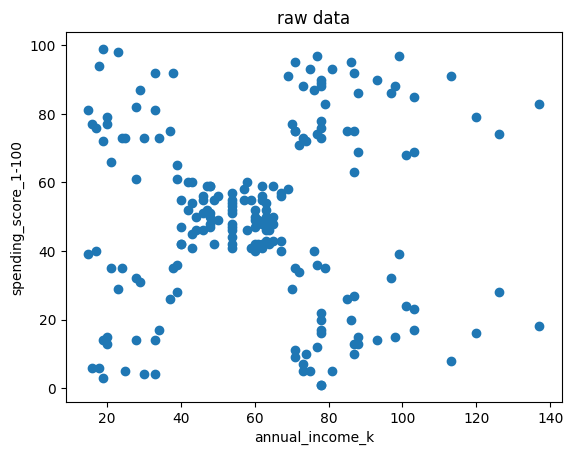

In [ ]:
# since there is no label,the model can use only is distance between points


# visulising raw data
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x['annual_income_k'],x['spending_score_1-100'])
plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.title('raw data')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5,random_state=42)
label=kmeans.fit_predict(x)

# n_cluster , divide the customer into 5 groups

# fit (5) - tooks at all data points in x, place
# 5 random centroids

# assigns each point to center of assigned points in
# iteration
# repeats until atable
# for each data point returns which cluster it belongs to
# represents them with numeric values

In [ ]:
label[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [ ]:
df["cluster"]=label
df.head()

,customerid,gender,age,annual_income_k,spending_score_1-100,cluster,segment
0,1,Male,19,15,39,4,high income-high spend
1,2,Male,21,15,81,2,low income-mid spend
2,3,Female,20,16,6,4,high income-high spend
3,4,Female,23,16,77,2,low income-mid spend
4,5,Female,31,17,40,4,high income-high spend


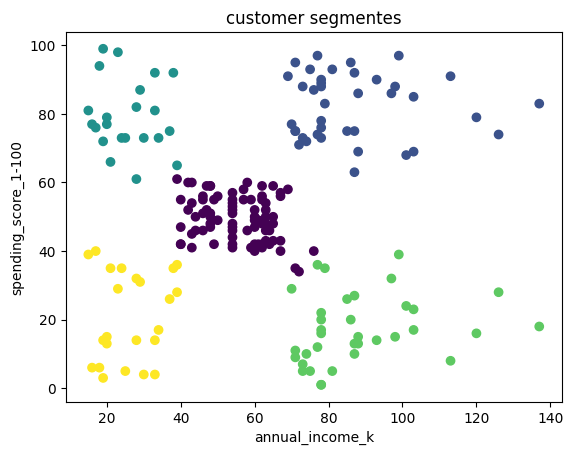

In [ ]:
# visualize clusters
plt.scatter(
    x['annual_income_k'],
    x['spending_score_1-100'],
    c=label
)
plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.title('customer segmentes')
plt.show()

In [ ]:
# elbow methods
# it helps to find how  many groups to use
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


  # wcss-within cluster sum of squares
  # lower wcss-tightly clusters
  # higher wcss-less dense clusters

  # we will store this for each kmeans each loop new model different number of clusters

  # in each loop k increases ,wcss decreases and improvement slows down after certain point

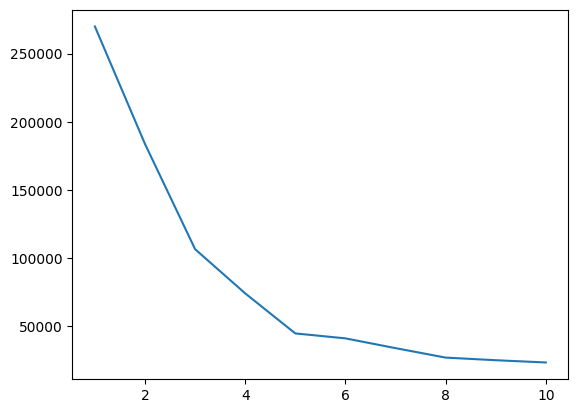

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=42)
label = kmeans_model.fit_predict(x)

In [ ]:
label[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [ ]:
df["cluster"]=label
df.head()

,customerid,gender,age,annual_income_k,spending_score_1-100,cluster,segment
0,1,Male,19,15,39,4,high income-high spend
1,2,Male,21,15,81,2,low income-mid spend
2,3,Female,20,16,6,4,high income-high spend
3,4,Female,23,16,77,2,low income-mid spend
4,5,Female,31,17,40,4,high income-high spend


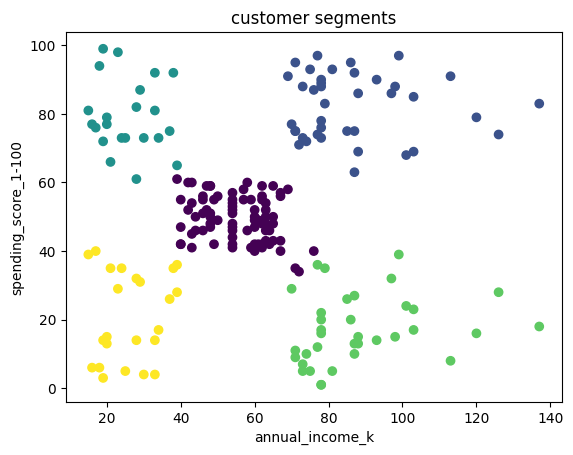

In [ ]:
plt.scatter(x['annual_income_k'],x['spending_score_1-100'],c=label)

plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.title('customer segments')
plt.show()

In [ ]:
# applying PCA here
# principal compound Analysis - PCA

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca = pca.fit_transform(x)

# components = 2 - reducing data 2 dimensions,
# information preserved mostly

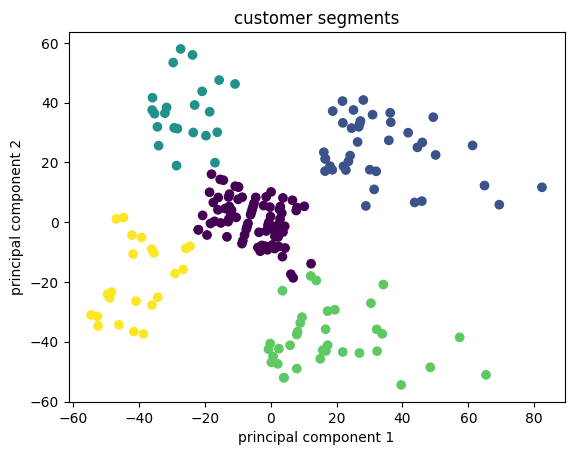

In [ ]:
# visualize clusters using PCA

plt.scatter(
    x_pca[:,0],
    x_pca[:,1],
    c=df['cluster']
)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('customer segments')
plt.show()

In [ ]:
df.groupby('cluster')[['annual_income_k','spending_score_1-100']].mean()

,annual_income_k,spending_score_1-100
cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [ ]:
df['segment']=df['cluster'].map({
    0:'mid income- mid spend',
    1:'low income-low spend',
    2:'low income-mid spend',
    3:'mid income-low spend',
    4:'high income-high spend'
})

In [ ]:
df.head()

,customerid,gender,age,annual_income_k,spending_score_1-100,cluster,segment
0,1,Male,19,15,39,4,high income-high spend
1,2,Male,21,15,81,2,low income-mid spend
2,3,Female,20,16,6,4,high income-high spend
3,4,Female,23,16,77,2,low income-mid spend
4,5,Female,31,17,40,4,high income-high spend


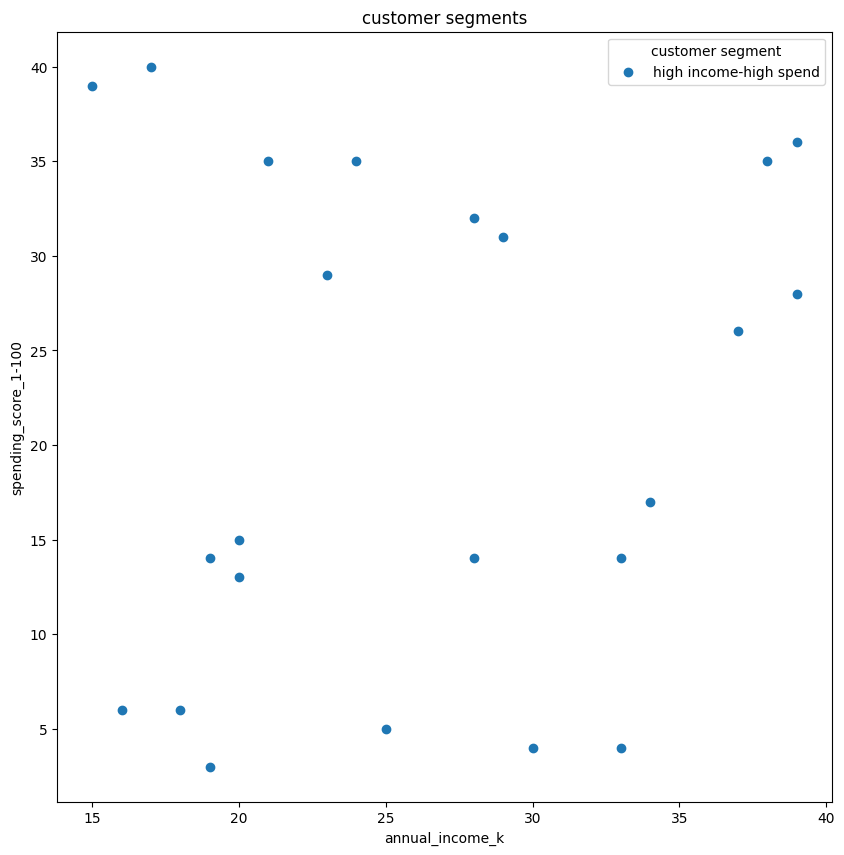

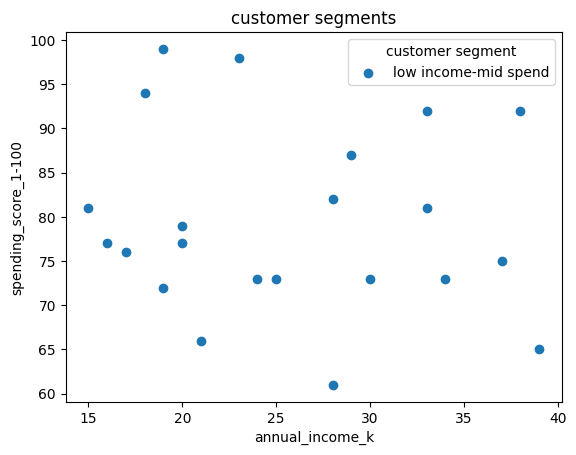

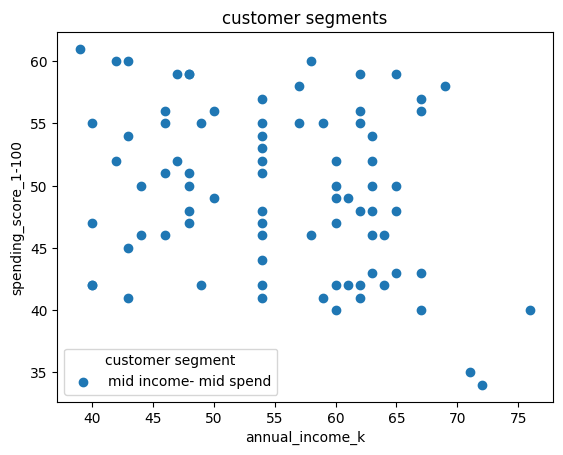

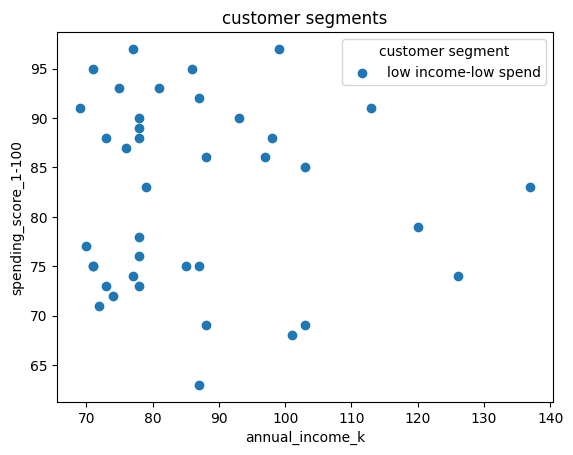

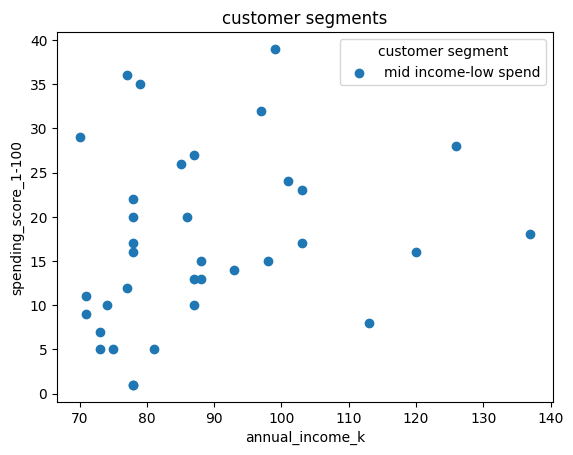

In [ ]:
plt.figure(figsize=(10,10))
for segment_name,cluster_id in df[['segment','cluster']].drop_duplicates().values:
  subset=df[df['cluster']==cluster_id]

  plt.scatter(subset['annual_income_k'],subset['spending_score_1-100'],label=segment_name
  )

  plt.xlabel('annual_income_k')
  plt.ylabel('spending_score_1-100')
  plt.title('customer segments')
  plt.legend(title='customer segment')
  plt.show()

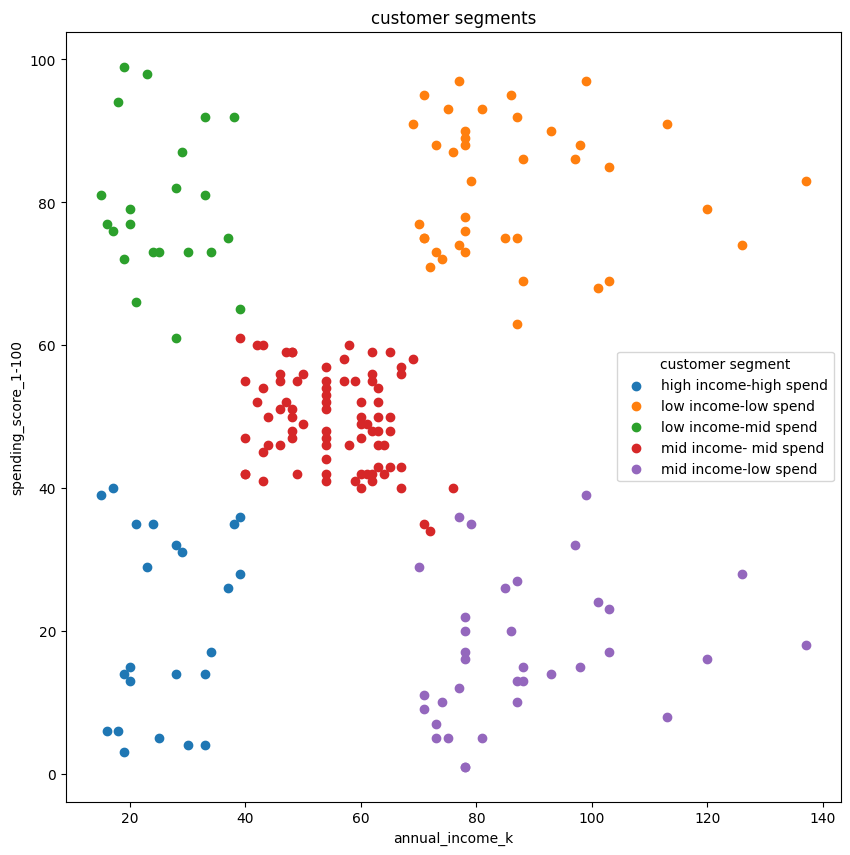

In [ ]:
plt.figure(figsize=(10,10))
for segment_name, group in df.groupby('segment'):
    plt.scatter(
        group['annual_income_k'],
        group['spending_score_1-100'],
        label=segment_name
    )

plt.xlabel('annual_income_k')
plt.ylabel('spending_score_1-100')
plt.title('customer segments')
plt.legend(title='customer segment')
plt.show()